In [1]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.animation import FuncAnimation

%matplotlib inline

# 2D robotic link (3 links)
'''
    /|--*--*--*
'''

'\n    /|--*--*--*\n'

In [2]:
from fabrik_solver import fabrik_solve
from newton2d3l_solver import NewtonSolver2D3L
from utils import compute_theta, compute_angles_from_trajectory, rad2degrees, degrees2rad

class IK:
    @staticmethod
    def solve(target, trajectory, jnts, links, thetas, algo='fabrik'):
        if algo == 'fabrik':
            return fabrik_solve(target, trajectory, jnts, links), None
        if algo == 'root_finding':
            solver = NewtonSolver2D3L(thetas, links)
            return solver.solve(target, trajectory, thetas, links, jnts), solver.thetas

In [3]:
def run_solver(links, jnts, thetas, algo):
    return IK.solve(target, trajectory, jnts, links, thetas, algo)
    
def setup_plot(target):
    fig = plt.figure(figsize=(10, 10))

    plt.grid()
    max_x = 15
    max_y = 15
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(0, max_x)
    plt.ylim(0, max_y)
    xdim = np.arange(0, max_x, 1)
    ydim = np.arange(0, max_y, 1)
    plt.xticks(xdim)
    plt.yticks(ydim)
    
    plt.scatter(target[0], target[1], marker='X', c='r')
    
    return fig

The robot arm is within reach
dist= 0.0011065106945241392
Trajectory size(fabrik): (4, 4, 2)
[[ 1.  1.]
 [ 1.  4.]
 [ 1.  7.]
 [ 1. 10.]]
[[1.        1.       ]
 [0.6583143 3.9804783]
 [2.1440015 6.586766 ]
 [3.8928964 4.149274 ]]
[[1.        1.       ]
 [0.6120888 3.9748151]
 [2.2742457 6.472261 ]
 [3.991407  4.01231  ]]
[[1.         1.        ]
 [0.60851157 3.9743466 ]
 [2.2845533  6.4624953 ]
 [3.9993675  4.000908  ]]

Angles: (3, 3)
[   6.53990613  -29.68485591 -144.34064945]
[ 0.88944772 -3.96060813 -0.74250303]
[ 0.06890295 -0.31913717 -0.05464493]


<ipython-input-4-d6f6e28e69be>:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


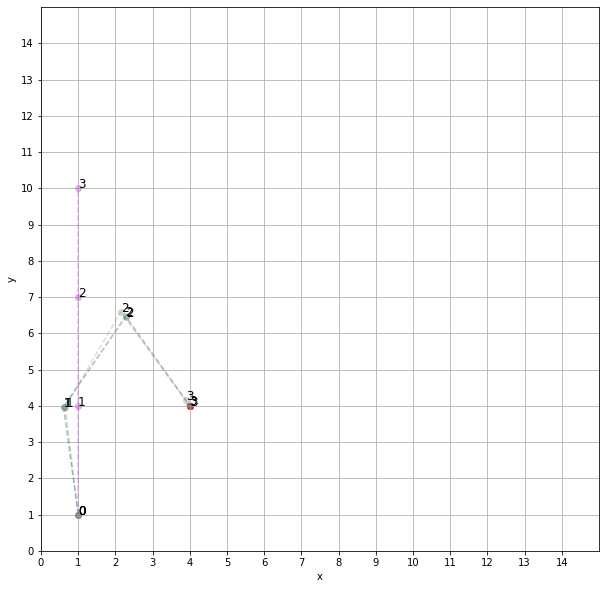

In [4]:
# robot arm topology
links = np.array([3, 3, 3]).astype(np.float32)
jnts = np.array([[1, 1], [1, 4], [1, 7], [1, 10]]).astype(np.float32)
thetas = degrees2rad(np.array([0.0, 0.0, 0.0]))

# Move the robot arm and solve IK: (x, y)
trajectory = [ np.copy(jnts) ]
target = np.array([4, 4])

trajectory, _ = run_solver(links, jnts, thetas, 'fabrik')
print(f'\nTrajectory size(fabrik): {trajectory.shape}')

fig = setup_plot(target)

for jnts in trajectory:
    print(jnts)
    color = [*np.random.random(3), 0.3]
    for idx in range(len(jnts)):
        plt.text(jnts[idx][0], jnts[idx][1], str(idx), fontsize=12)
    plt.plot(jnts[:, 0], jnts[:, 1], marker='o', linestyle='--', color=color)
    
deltas = compute_angles_from_trajectory(trajectory)

print(f'\nAngles: {deltas.shape}')
for idx in range(deltas.shape[0]):
    print(deltas[idx])
    
fig.show()

Loss: 9.7327414541292477

/home/filip.grigorov/Workspace/training/robotics/inverse_kinematics_solver/inverse_kinematics_solver/newton2d3l_solver.py:68: RuntimeWarning: divide by zero encountered in true_divide
  np.fill_diagonal(sInv, np.where(s > 0, 1.0 / s, s))


Loss: 0.03195644330994244
Trajectory size: (2401, 4, 2)
Summary: 

Thetas:
[-75.70060657 -66.4037609  -77.13997808]


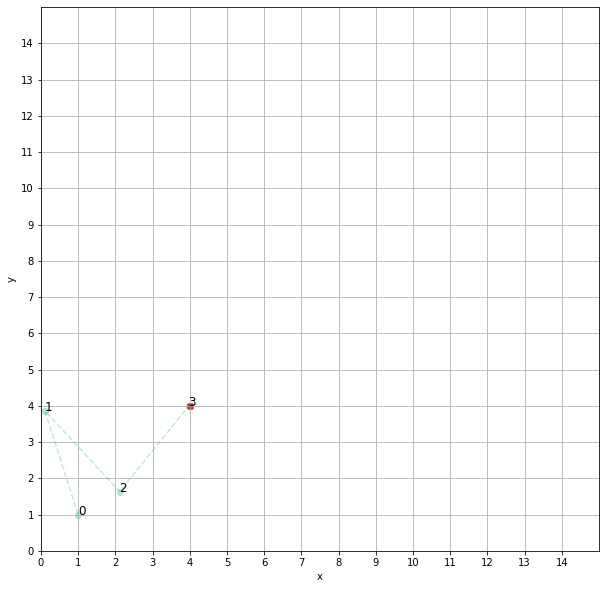

In [5]:
links = np.array([3, 3, 3]).astype(np.float32)
jnts = np.array([[1, 1], [1, 4], [1, 7], [1, 10]]).astype(np.float32)
thetas = degrees2rad(np.array([0.0, 0.0, 0.0]))

# Move the robot arm and solve IK: (x, y)
trajectory = [ np.copy(jnts) ]
target = np.array([4, 4])

trajectory, thetas = run_solver(links, jnts, thetas, 'root_finding')
print(f'\nTrajectory size: {trajectory.shape}')

print('Summary: \n')
print(F'Thetas:\n{thetas}')

fig = setup_plot(target)

jnts = trajectory[-1]
color = [*np.random.random(3), 0.3]
for idx in range(len(jnts)):
    plt.text(jnts[idx][0], jnts[idx][1], str(idx), fontsize=12)
plt.plot(jnts[:, 0], jnts[:, 1], marker='o', linestyle='--', color=color)